# Mini Project 1

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

**Instructions** Use current stock data to create two potentially profitable investment portfolios. One that is higher risk and one that is lower risk.

-- You are to interpret and explain your interpretation of a high risk profile and low risk profile of a portfolio. You should provide some measurable quantitative data in your explanation.

In [1]:
#Import Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import datetime as dt
sns.set_style('darkgrid')

import yfinance as yf

In this project, we will build a portfolio of Tesla, Meta, Google, Microsoft, Toyota Motors, and General motors stocks. The aim of this study is to build a high risk and a low risk portfolio given a few constraints.

In [2]:
#load data for Ford (F) and General Motors (GM) stock
tickers = ['TSLA', 'META', 'GOOG', 'MSFT', 'TM', 'GM']

start_date = dt.datetime.today()-dt.timedelta(days = 365)
end_date = dt.datetime.today()

stock = yf.download(tickers, start = start_date, end =end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  6 of 6 completed


In [3]:
stock.tail()

Price           Close                                                  \
Ticker             GM        GOOG        META        MSFT          TM   
Date                                                                    
2025-05-20  50.209999  165.320007  637.099976  458.170013  186.360001   
2025-05-21  49.369999  170.059998  635.500000  452.570007  184.470001   
2025-05-22  49.279999  171.979996  636.570007  454.859985  182.820007   
2025-05-23  48.689999  169.589996  627.059998  450.179993  182.300003   
2025-05-27  49.090000  173.979996  642.320007  460.690002  186.679993   

Price                        High                                      ...  \
Ticker            TSLA         GM        GOOG        META        MSFT  ...   
Date                                                                   ...   
2025-05-20  343.820007  50.549999  169.679993  639.349976  458.339996  ...   
2025-05-21  334.619995  50.540001  174.529999  646.609985  457.779999  ...   
2025-05-22  341.040009  49.680000  178.130005  643.250000  460.250000  ...   
2025-05-23  339.339996  49.169998  171.205002  632.450012  453.690002  ...   
2025-05-27  362.890015  49.459999  174.289993  643.080017  460.950012  ...   

Price             Open                                       Volume            \
Ticker            META        MSFT          TM        TSLA       GM      GOOG   
Date                                                                            
2025-05-20  636.010010  455.589996  186.149994  347.869995  6565400  33563300   
2025-05-21  631.789978  454.570007  185.720001  344.429993  7515600  45567600   
2025-05-22  634.049988  454.950012  181.990005  331.899994  6378200  45024100   
2025-05-23  624.000000  449.980011  181.250000  337.920013  5611900  24963600   
2025-05-27  635.409973  456.480011  185.039993  347.350006  8935400  24321900   

Price                                              
Ticker          META      MSFT      TM       TSLA  
Date                                               
2025-05-20   6743500  15441800  309900  131715500  
2025-05-21  11464600  19216900  257100  102354800  
2025-05-22   8228400  18025600  378800   97113400  
2025-05-23   8454100  16883500  485200   84654800  
2025-05-27   9486300  20953400  331000  118574100  

[5 rows x 30 columns]

In [4]:
daily_returns = np.log(stock['Close']/stock['Close'].shift(1))
daily_returns = daily_returns.dropna()

In [5]:
daily_returns

Ticker,GM,GOOG,META,MSFT,TM,TSLA
Date,,,,,,
2024-05-29,-0.010498,-0.003489,-0.011653,-0.002676,-0.022050,-0.003173
2024-05-30,0.017897,-0.021884,-0.015530,-0.034370,0.001028,0.014649
2024-05-31,0.035750,0.002302,-0.000471,0.001109,0.015475,-0.003979
2024-06-03,0.016533,0.002641,0.022578,-0.003886,-0.024857,-0.010103
2024-06-04,-0.010550,0.004062,-0.001048,0.006148,-0.008472,-0.008659
...,...,...,...,...,...,...
2025-05-20,0.003591,-0.015307,-0.005213,-0.001527,0.005596,0.005044
2025-05-21,-0.016871,0.028268,-0.002515,-0.012298,-0.010193,-0.027123
2025-05-22,-0.001825,0.011227,0.001682,0.005047,-0.008985,0.019004


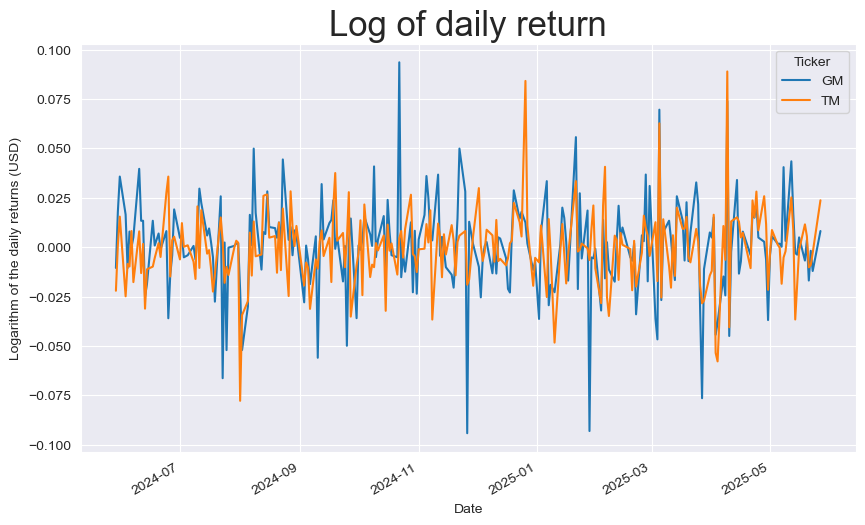

In [6]:
daily_returns.plot(y=['GM', 'TM'], figsize=(10,6), grid=True)
plt.title(f'Log of daily return', size = 25)
plt.ylabel('Logarithm of the daily returns (USD)')
plt.show()

In [7]:
annualized_expectation = {ticker: np.mean(daily_returns[ticker]) for ticker in tickers}
annualized_volatility = {ticker: np.std(daily_returns[ticker])*np.sqrt(252) for ticker in tickers}

In [8]:
annualized_volatility

{'TSLA': 0.7132218683586194,
 'META': 0.3681794108544255,
 'GOOG': 0.3136186972391274,
 'MSFT': 0.25694579937645495,
 'TM': 0.3023787301908751,
 'GM': 0.37418555238904166}

In [9]:
annualized_expectation

{'TSLA': 0.002889010014571214,
 'META': 0.0011851751329836964,
 'GOOG': -7.321430718043247e-05,
 'MSFT': 0.0003045542806930559,
 'TM': -0.0005785831426170754,
 'GM': 0.0005634136876031072}

In [10]:
covariance_matrix = 252*((daily_returns).cov())

In [11]:
covariance_matrix

Ticker,GM,GOOG,META,MSFT,TM,TSLA
Ticker,,,,,,
GM,0.140579,0.033336,0.043484,0.024993,0.049563,0.077666
GOOG,0.033336,0.098753,0.071800,0.049039,0.035195,0.128466
META,0.043484,0.071800,0.136103,0.063682,0.041886,0.139410
MSFT,0.024993,0.049039,0.063682,0.066287,0.027502,0.096225
TM,0.049563,0.035195,0.041886,0.027502,0.091802,0.071560
TSLA,0.077666,0.128466,0.139410,0.096225,0.071560,0.510737


Our two main tools will be to study the expected value and the volatility (a notion proportional to the standard deviation). The idea will be to maximize the expected value for the high risk profile, and to minimize the volatility for the low risk profile. That is, if we are willing to risk more, we are mostly interested in maximizing the return, while if we aim to have a lower risk portfolio, we want to reduce the volatility, so that our portfolio is closer in value to what we expect.

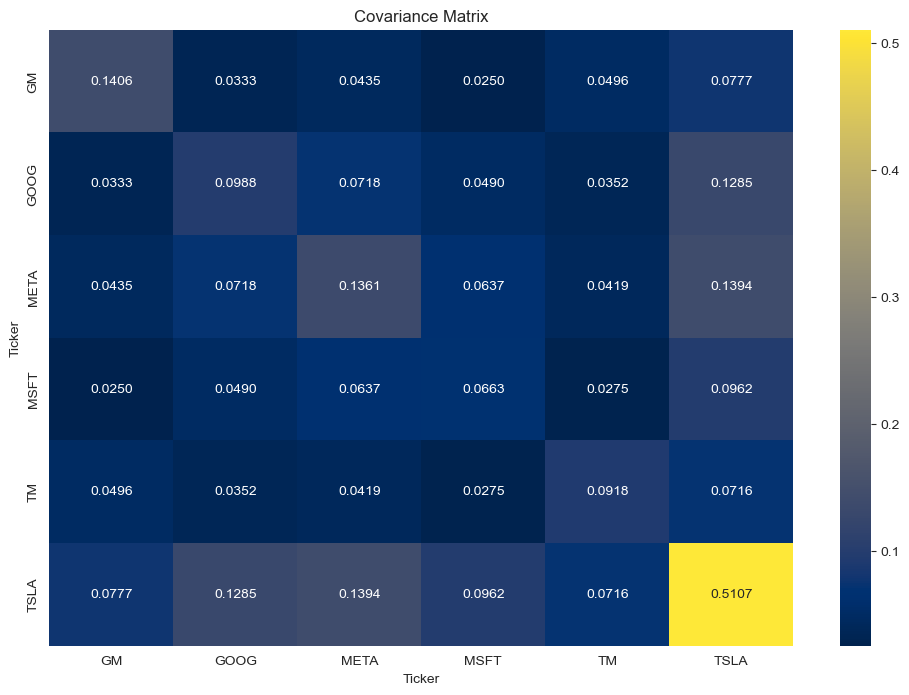

In [12]:
plt.figure(figsize = (12,8))
sns.heatmap(covariance_matrix, annot=True, cmap='cividis', fmt ='.4f')
plt.title('Covariance Matrix')
plt.show()

In [27]:
n_assets = len(tickers)

initial_weights = np.array([1/n_assets] * n_assets)

constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1},
               {'type': 'ineq', 'fun': lambda weights: min(weights)-.1},
              {'type': 'ineq', 'fun': lambda weights: .35-max(weights)})

# Define the objective function to minimize portfolio variance
def portfolio_volatility(weights):
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    return portfolio_std_dev

result = minimize(portfolio_volatility, initial_weights, constraints=constraints)

optimal_weights = result.x

print("Optimal Asset Weights to minimize volatility:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: Weight = {weight:.4f}")

Optimal Asset Weights to minimize volatility:
TSLA: Weight = 0.1250
META: Weight = 0.1254
GOOG: Weight = 0.1000
MSFT: Weight = 0.3032
TM: Weight = 0.2464
GM: Weight = 0.1000


In [14]:
print(f' The optimal volatility subject to the constraints is {result.fun}')

 The optimal volatility subject to the constraints is 0.25301753551118955


In [58]:
optimized_stock_returns = pd.Series(np.dot(daily_returns, optimal_weights))

In [59]:
daily_returns['GM']

Date
2024-05-29   -0.010498
2024-05-30    0.017897
2024-05-31    0.035750
2024-06-03    0.016533
2024-06-04   -0.010550
                ...   
2025-05-20    0.003591
2025-05-21   -0.016871
2025-05-22   -0.001825
2025-05-23   -0.012045
2025-05-27    0.008182
Name: GM, Length: 249, dtype: float64

In [74]:
daily_returns['Test'] = optimized_stock_returns.to_numpy()

In [75]:
daily_returns

Ticker,GM,GOOG,META,MSFT,TM,TSLA,Test
Date,,,,,,,
2024-05-29,-0.010498,-0.003489,-0.011653,-0.002676,-0.022050,-0.003173,-0.009478
2024-05-30,0.017897,-0.021884,-0.015530,-0.034370,0.001028,0.014649,-0.010762
2024-05-31,0.035750,0.002302,-0.000471,0.001109,0.015475,-0.003979,0.008462
2024-06-03,0.016533,0.002641,0.022578,-0.003886,-0.024857,-0.010103,-0.003659
2024-06-04,-0.010550,0.004062,-0.001048,0.006148,-0.008472,-0.008659,-0.002004
...,...,...,...,...,...,...,...
2025-05-20,0.003591,-0.015307,-0.005213,-0.001527,0.005596,0.005044,-0.000571
2025-05-21,-0.016871,0.028268,-0.002515,-0.012298,-0.010193,-0.027123,-0.007770
2025-05-22,-0.001825,0.011227,0.001682,0.005047,-0.008985,0.019004,0.002564


In [73]:
optimized_stock_returns.to_numpy()

array([-9.47774878e-03, -1.07623888e-02,  8.46167636e-03, -3.65895429e-03,
       -2.00407198e-03,  9.53971808e-03,  4.65766375e-03, -6.32407159e-03,
        1.02563101e-02,  2.07733550e-03,  1.29388837e-02, -1.04852313e-02,
       -5.62332657e-03,  9.13377651e-03, -7.06233536e-03,  4.76350642e-04,
        2.59979787e-03,  7.33634602e-03,  1.46982817e-02,  4.69460354e-04,
        3.57429527e-03, -5.36587554e-03,  1.23321021e-02,  1.75081355e-02,
        7.33973552e-03,  1.49535733e-02, -4.97416204e-03, -5.38658923e-03,
        1.29021924e-02, -2.30466959e-02,  6.50300948e-03,  2.36177077e-03,
       -3.72108015e-03, -1.73960473e-02, -7.43112212e-03, -1.28419888e-02,
        2.09020421e-02, -7.81038228e-03, -4.06262354e-02, -2.00439607e-02,
        3.55349633e-03,  8.32775378e-03, -5.86684931e-03,  5.09768273e-03,
       -2.53458036e-02, -3.05655146e-02, -3.33840041e-02,  1.18641256e-02,
       -9.73032092e-03,  2.28304287e-02,  6.88091258e-03, -4.44646623e-03,
        2.16954654e-02,  

In [15]:
n_assets = len(tickers)

initial_weights = np.array([1/n_assets] * n_assets)

expctd = list(annualized_expectation.values())

constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1},
               {'type': 'ineq', 'fun': lambda weights: min(weights)-.1},
              {'type': 'ineq', 'fun': lambda weights: .35-max(weights)})

def portfolio_mean(weights):
    portfolio_mn = - np.dot(weights.T, expctd)
    return portfolio_mn

result = minimize(portfolio_mean, initial_weights, constraints=constraints)

optimal_weights = result.x

print("Optimal Asset Weights to maximize expected return:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: Weight = {weight:.4f}")

Optimal Asset Weights to maximize expected return:
TSLA: Weight = 0.3500
META: Weight = 0.1959
GOOG: Weight = 0.1000
MSFT: Weight = 0.1151
TM: Weight = 0.1001
GM: Weight = 0.1389


In [16]:
print(f' The optimal mean subject to the constraints is {-result.fun}')

 The optimal mean subject to the constraints is 0.00129145787156409
